## Search Tree -> Similar Words

In [7]:
csv_path = r'D:\NLP\Week 5\sqlResult_1558435.csv'

In [8]:
import pandas as pd

In [9]:
content = pd.read_csv(csv_path, encoding = 'gb18030')

In [10]:
content = content.fillna('')

In [11]:
news_content = content['content'].tolist()

In [12]:
import jieba

In [13]:
def cut(string):
    return ' '.join(jieba.cut(string))

In [14]:
cut('这是一个测试')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\thinkpad\AppData\Local\Temp\jieba.cache
Loading model cost 1.099 seconds.
Prefix dict has been built succesfully.


'这是 一个 测试'

In [15]:
import re

In [16]:
# Remove non-digital/alphabetic characters.
def token(string):
    return re.findall(r'[\d|\w]+', string)

In [17]:
token('这是一个测试\n\n\n\n\n')

['这是一个测试']

#### 1） 切词，获取用作词向量的单词语料

In [18]:
news_content = [token(n) for n in news_content]

In [19]:
news_content = [' '.join(n) for n in news_content]

In [20]:
news_content = [cut(n) for n in news_content]

In [21]:
news_content[1]

'骁龙 835 作为 唯一 通过 Windows   10 桌面 平台 认证 的 ARM 处理器   高通 强调   不会 因为 只 考虑 性能 而 去 屏蔽掉 小 核心   相反   他们 正 联手 微软   找到 一种 适合 桌面 平台 的   兼顾 性能 和 功耗 的 完美 方案   报道 称   微软 已经 拿到 了 一些 新 的 源码   以便 Windows   10 更好 地 理解 big   little 架构   资料 显示   骁龙 835 作为 一款 集成 了 CPU   GPU   基带   蓝牙   Wi   Fi 的 SoC   比 传统 的 Wintel 方案 可以 节省 至少 30   的 PCB 空间   按计划   今年 Q4   华硕   惠普   联想 将 首发 骁龙 835   Win10 电脑   预计 均 是 二合一 形态 的 产品   当然   高通 骁龙 只是 个 开始   未来 也许 还 能 见到 三星 Exynos   联发科   华为 麒麟   小米 澎湃 等 进入 Windows   10 桌面 平台'

In [22]:
with open('news-sentences-cut.txt', 'w') as f:
    for n in news_content:
        f.write(n + '\n')

In [23]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

C:\Anaconda\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [24]:
# Train word vectors.
news_wv = Word2Vec(LineSentence('news-sentences-cut.txt'), size=35, workers=8)

In [25]:
news_wv.wv.most_similar('中国')

[('香港', 0.7907305955886841),
 ('亚洲', 0.7828283905982971),
 ('大陆', 0.7745433449745178),
 ('全球', 0.7674386501312256),
 ('世界', 0.7625892162322998),
 ('海外', 0.7579659819602966),
 ('全世界', 0.7484601736068726),
 ('欧洲', 0.7375211715698242),
 ('国内', 0.7269822359085083),
 ('我国', 0.7244007587432861)]

In [26]:
# Get similar words.
news_wv.wv.most_similar('葡萄牙', topn = 20)

# If the results contain wrong type of words, 
# in this case words that do not denotate countries,
# reasons may be that data are not large enough 
# or word cutting has somes problems.

[('捷克', 0.8670088052749634),
 ('克罗地亚', 0.8625674247741699),
 ('乌拉圭', 0.8507236242294312),
 ('意大利', 0.8399946689605713),
 ('苏格兰', 0.8229215145111084),
 ('拉脱维亚', 0.8157182335853577),
 ('奥地利', 0.8149220943450928),
 ('巴塞罗那', 0.8067622184753418),
 ('中国香港', 0.8036572933197021),
 ('瑞士', 0.803390622138977),
 ('西班牙', 0.8016976118087769),
 ('瑞典', 0.8002038598060608),
 ('丹麦', 0.7881598472595215),
 ('科特迪瓦', 0.7846090197563171),
 ('比什凯克', 0.7819939851760864),
 ('比利时', 0.7775196433067322),
 ('摩洛哥', 0.7724032402038574),
 ('斯洛文尼亚', 0.772065281867981),
 ('伊斯坦布尔', 0.7676131725311279),
 ('罗马尼亚', 0.7661483883857727)]

In [30]:
news_wv.wv.most_similar('说')

[('表示', 0.9003351330757141),
 ('指出', 0.8409748673439026),
 ('认为', 0.83518385887146),
 ('看来', 0.8184497356414795),
 ('坦言', 0.7952199578285217),
 ('介绍', 0.7857379913330078),
 ('文说', 0.7725106477737427),
 ('告诉', 0.7638469934463501),
 ('透露', 0.7474899291992188),
 ('称', 0.7375125885009766)]

In [31]:
news_wv.wv.most_similar('认为')

[('指出', 0.9195852279663086),
 ('表示', 0.8724240064620972),
 ('看来', 0.8565329313278198),
 ('说', 0.8351839780807495),
 ('称', 0.7940790057182312),
 ('坦言', 0.7854640483856201),
 ('普遍认为', 0.7130546569824219),
 ('透露', 0.7062931656837463),
 ('强调', 0.6998592019081116),
 ('建议', 0.6885287761688232)]

In [32]:
news_wv.wv.most_similar('强调')

[('指出', 0.8150553703308105),
 ('特别强调', 0.7741744518280029),
 ('表示', 0.7664375305175781),
 ('重申', 0.7372335195541382),
 ('一贯', 0.7280725240707397),
 ('一说', 0.715409517288208),
 ('呼吁', 0.7078633308410645),
 ('认为', 0.6998591423034668),
 ('高度重视', 0.6937757730484009),
 ('明确提出', 0.676885724067688)]

#### 2.）通过定义搜索方式获取相近意思的词汇

In [33]:
from collections import defaultdict

In [36]:
def get_related_words(init_words, model):
    """
    @init_word are words we already know. We want to find their synonyms.
    @model is a word2vec model.
    
    """
    unseen = init_words
    
    seen = defaultdict(int)
    max_size = 500 # could be large
    
    while unseen and len(seen) < max_size:
        if len(seen) % 50 == 0:
            print('Seen length: {}'.format(len(seen)))
            
        node = unseen.pop(0)
        
        new_expanding = [w for w, s in model.wv.most_similar(node, topn = 20)]
        
        unseen += new_expanding
        
        seen[node] += 1 #? how to grade
    
    return seen
        
        
# repetitive search pattern/decorator
# Optimazation: 1.Score function could be  revised;
#               2. Use DP to reduce computing time.
# weak supervision

In [35]:
len(news_wv.wv.vocab)

97927

In [37]:
related_words = get_related_words(['说', '表示'], news_wv)

Seen length: 0
Seen length: 50
Seen length: 50
Seen length: 50
Seen length: 100
Seen length: 150
Seen length: 150
Seen length: 150
Seen length: 200
Seen length: 250
Seen length: 300
Seen length: 300
Seen length: 300
Seen length: 300
Seen length: 300
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Seen length: 350
Se

In [38]:
sorted(related_words.items(), key=lambda x: x[1], reverse=True)

[('说', 86),
 ('表示', 83),
 ('指出', 82),
 ('认为', 79),
 ('坦言', 77),
 ('透露', 76),
 ('提到', 74),
 ('特别强调', 70),
 ('看来', 65),
 ('介绍', 54),
 ('文说', 53),
 ('告诉', 51),
 ('强调', 49),
 ('称', 48),
 ('所说', 46),
 ('中说', 44),
 ('明说', 38),
 ('写道', 38),
 ('普遍认为', 30),
 ('说明', 29),
 ('表明', 27),
 ('建议', 26),
 ('中称', 26),
 ('相信', 26),
 ('称赞', 23),
 ('呼吁', 23),
 ('反映', 22),
 ('提及', 22),
 ('时说', 21),
 ('说道', 20),
 ('问', 18),
 ('直言', 17),
 ('看法', 16),
 ('估计', 16),
 ('接受', 15),
 ('对此', 14),
 ('眼中', 14),
 ('知情', 14),
 ('解释', 14),
 ('留意到', 13),
 ('一方面', 12),
 ('如是说', 12),
 ('还称', 12),
 ('反复强调', 12),
 ('阐述', 12),
 ('声称', 11),
 ('请问', 11),
 ('时称', 11),
 ('觉得', 10),
 ('地说', 10),
 ('证实', 10),
 ('说法', 10),
 ('国土报', 10),
 ('所指', 10),
 ('坚信', 10),
 ('赞赏', 10),
 ('给出', 10),
 ('FOMC', 9),
 ('来说', 9),
 ('还是', 9),
 ('肯定', 9),
 ('来讲', 9),
 ('这篇大', 9),
 ('引用', 9),
 ('回答', 9),
 ('描述', 9),
 ('知道', 9),
 ('批评', 9),
 ('而言', 8),
 ('谈到', 8),
 ('郑军', 8),
 ('海涛', 8),
 ('武说', 8),
 ('张伟', 8),
 ('写信给', 8),
 ('得知', 8),
 ('披露', 8),
 ('声言', 

### TFIDF Key Words

In [39]:
content.head()

,id,author,source,content,feature,title,url
0,89617,,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [40]:
news_content[0]

'此外   自 本周   6 月 12 日   起   除 小米 手机 6 等 15 款 机型 外   其余 机型 已 暂停 更新 发布   含 开发 版   体验版 内测   稳定版 暂不受 影响   以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作   有人 猜测 这 也 是 将 精力 主要 用到 MIUI   9 的 研发 之中   MIUI   8 去年 5 月 发布   距今已有 一年 有余   也 是 时候 更新换代 了   当然   关于 MIUI   9 的 确切 信息   我们 还是 等待 官方消息'

In [41]:
# Get the frequency of a word occurring in one doc in terms of all documents.
def document_frequency(word):
    return sum(1 for n in news_content if word in n)

In [42]:
document_frequency('全部')

3389

In [43]:
import math

In [44]:
def idf(word):
    """We get the inverse document frequency."""
    return math.log10(len(news_content) / document_frequency(word))

In [45]:
idf('的') < idf('全部')

True

In [46]:
def tf(word, document):
    """
    Get term frequency of a @word in a @document.
    """
    words = document.split() # 单词可以提前分出来
    return sum(1 for w in words if w == word)

In [47]:
content['content'][11]

'?\r\n\u3000\u3000巨丰早评：市场将再次探底\r\n\u3000\u3000【巨丰观点】\r\n\u3000\u3000周四大盘冲高回落，2500余只个股下跌。上证50、沪深300指数顽强收红。早盘大盘低开高走，展开反弹，沪指冲破120日均线压力位；午后大盘跳水，个股普跌。盘面上，保险、电力、银行、民航机场、券商、房地产、人工智能、迪士尼、网络安全等板块涨幅居前。雄安新区、福州新区、医疗器械、丝绸之路等跌幅居前。\r\n\u3000\u3000金融股全线大涨：保险板块涨3%：新华保险、中国太保、中国人寿涨4%，中国平安涨2%；西水股份、天茂集团盘中大涨7%以上。银行板块涨2%：招商银行大涨8%，贵阳银行、兴业银行、浦发银行、兴业银行等涨幅居前。金融股是A股纳入MSCI指数的受益者，后市可以逢低关注。\r\n\u3000\u3000盘中万达电影、复星医药等白马股闪崩，导致午后市场出现大幅跳水。盘后消息，银监会于6月中旬要求各家银行排查包括万达、海航集团、复星、浙江罗森内里在内数家企业的授信及风险分析，排查对象多是近年来海外投资比较凶猛、在银行业敞口较大的民营企业集团。\r\n\u3000\u3000巨丰投顾认为自5月以来，大盘已经走出了3重底的走势，并开启中级反弹行情。沪指在上证50及白马股推动下率先反弹，但遭遇60日、120日均线强压力而出现调整。MSCI纳入A股后，沪深300指数创17个月新高，但2500余股下跌，市场分化明显。随着6月末市场流动性紧张的可能出现，市场将再次出现探底。建议投资者重点关注半年报大幅预增的错杀股和具备估值优势的大蓝筹。\r\n\u3000\u3000天信投资：尾盘跳水原因揭秘 伏击的品种曝光\r\n\u3000\u3000周四市场点评：\r\n\u3000\u3000沪深两市早盘纷纷低开，但是开盘之后权重板块崛起，其中保险和银行表现尤其明显，低矮动股指快速拉升，并顺势突破了60日均线和半年线的束缚；在主板拉升的过程中，市场的分化格局也较明显，题材板块和创业板表现相对较弱。不过虽然市场在早盘的上攻，但是成交量萎缩明教明显，所以这种上涨比较虚。果不其然，午后个股再度纷纷杀跌，同时股指也是顺势回落，沪市的半年线得而复失，形成长长的上影线；而创业板股指在回落的过程中失守5日均线的支撑。整体上周四市场全天保持宽幅震荡走势，尤其是沪

In [48]:
tf('创业板', news_content[11])

6

In [49]:
idf('创业板')

2.506757120518876

In [50]:
idf('短期')

1.9923664854640575

In [51]:
tf('短期', news_content[11])

3

In [52]:
# Get keywords of a document.
def get_doc_keywords(document):
    words = set(document.split())
    
    tfidf = [
        (w, tf(w, document) * idf(w)) for w in words
    ]
    
    tfidf = sorted(tfidf, key=lambda x: x[1], reverse=True)
    
    return tfidf

In [53]:
get_doc_keywords(news_content[0])

[('MIUI', 13.953993984385477),
 ('机型', 5.854110917055407),
 ('稳定版', 4.9523613237924735),
 ('暂不受', 4.9523613237924735),
 ('体验版', 4.9523613237924735),
 ('系统优化', 4.9523613237924735),
 ('精力', 4.865066660033509),
 ('内测', 4.17421007340883),
 ('官方消息', 3.9523613237924735),
 ('距今已有', 3.6301420290585544),
 ('更新换代', 3.433847383914586),
 ('用到', 3.339577467072738),
 ('确切', 3.139447967149618),
 ('有余', 3.0128420711738553),
 ('小米', 2.948039950009831),
 ('猜测', 2.6828483795745575),
 ('本周', 2.3069390544433817),
 ('其余', 2.2953054709353697),
 ('工程师', 2.2595144045152438),
 ('更新', 2.2143739974590426),
 ('暂停', 2.188933330229536),
 ('发布', 2.15877938610806),
 ('之中', 2.129539678489369),
 ('当然', 2.040139267260058),
 ('等待', 2.0327603000083627),
 ('有人', 1.7504182603908234),
 ('研发', 1.7322532357524185),
 ('手机', 1.7180971994136842),
 ('确保', 1.6071837072497697),
 ('含', 1.5902560044987006),
 ('集中', 1.558260021752429),
 ('时候', 1.5056688574209465),
 ('版', 1.4878717763585023),
 ('开发', 1.428354878235101),
 ('关于', 1.4239588

In [62]:
%prun get_doc_keywords(news_content[11])

# %prun (in jupyter notebook) displays the internal time for each operation step. See picture as follow.

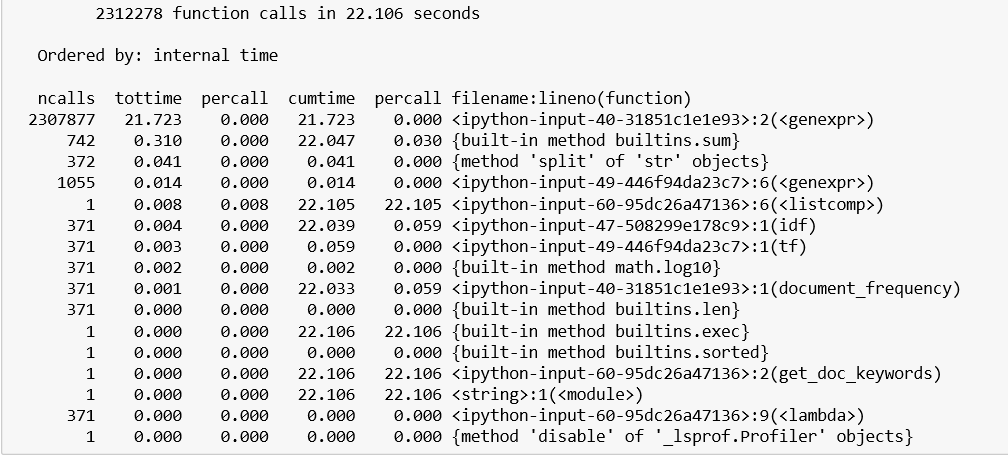

In [54]:
get_doc_keywords(news_content[101])

[('机械', 19.73268423154147),
 ('工业', 13.726799287798574),
 ('百强', 12.218936930008129),
 ('机械行业', 11.732905915902746),
 ('中机联', 9.904722647584947),
 ('王瑞祥', 9.904722647584947),
 ('增速', 8.057368905265053),
 ('态势', 7.971371787277902),
 ('恢复性', 6.867694767829172),
 ('规模', 6.861746056315247),
 ('回落', 6.643121992377128),
 ('增长', 6.604587773896507),
 ('企业', 6.260042817487905),
 ('陈斌', 5.9311791790524575),
 ('呈现', 5.279381611367784),
 ('原材料', 5.215938100214726),
 ('但远', 4.9523613237924735),
 ('16992', 4.9523613237924735),
 ('刘瑾', 4.651331328128492),
 ('三十', 4.6438668975349),
 ('入围', 4.629743188559925),
 ('钢铁', 4.588699854270723),
 ('回升', 4.553165964236777),
 ('联合会', 4.4415451172114695),
 ('行业', 4.256149034981132),
 ('后移', 4.253391319456455),
 ('前十强', 4.253391319456455),
 ('发展', 4.24347205022841),
 ('亿元', 4.194707226838383),
 ('更新改造', 4.17421007340883),
 ('机械类', 4.17421007340883),
 ('相当规模', 4.17421007340883),
 ('年降', 4.107263283778217),
 ('徐工', 3.9981188143531488),
 ('工程', 3.9916862993694178),
 

## Word Cloud

In [1]:
!pip install wordcloud

In [59]:
import wordcloud
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
wc = wordcloud.WordCloud(r'D:\NLP\Week 6\SourceHanSerifSC-Regular.otf')

In [57]:
machine_new_keywords = get_doc_keywords(news_content[101])
machine_new_keywords_dict = {w: score for w, score in machine_new_keywords}

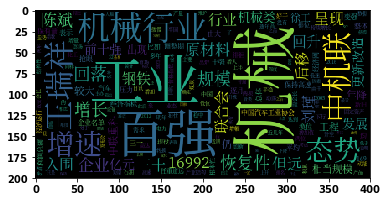

In [62]:
plt.imshow(wc.generate_from_frequencies(machine_new_keywords_dict));

In [69]:
financing_news = get_doc_keywords(news_content[90])

In [70]:
from PIL import Image
import numpy as np

In [71]:
mask = np.array(Image.open(r'D:\NLP\Week 6\Lesson-06-Keywords\timg.jpg'))

In [72]:
wordcloud_with_mask = wordcloud.WordCloud(
font_path=r'D:\NLP\Week 6\SourceHanSerifSC-Regular.otf',
mask=mask
)

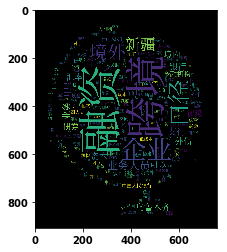

In [73]:
plt.imshow(wordcloud_with_mask.generate_from_frequencies({w:s for w,s in financing_news}))

## TFIDF Vectorized

scikit learning 通过文本向量化，获取相似文本。

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [77]:
vectorized = TfidfVectorizer()

In [75]:
# Use top 1000 articles as our sample.
sample_num = 1000
sub_samples = news_content[:sample_num]

In [79]:
x = vectorized.fit_transform(sub_samples)

In [80]:
x.shape

(1000, 43851)

In [81]:
vectorized.vocabulary_

{'此外': 27288,
 '本周': 25803,
 '12': 97,
 '小米': 18002,
 '手机': 21587,
 '15': 171,
 '机型': 25938,
 '其余': 9234,
 '暂停': 25185,
 '更新': 25298,
 '发布': 12453,
 '开发': 19567,
 '体验版': 7609,
 '内测': 9359,
 '稳定版': 32707,
 '暂不受': 25182,
 '影响': 20125,
 '确保': 32141,
 '工程师': 18563,
 '可以': 12866,
 '集中': 41995,
 '全部': 8854,
 '精力': 33464,
 '进行': 39712,
 '系统优化': 33539,
 '工作': 18517,
 '有人': 25490,
 '猜测': 30199,
 '主要': 5480,
 '用到': 30792,
 'miui': 2143,
 '研发': 32063,
 '之中': 5540,
 '去年': 12200,
 '距今已有': 38706,
 '一年': 3096,
 '有余': 25495,
 '时候': 24798,
 '更新换代': 25299,
 '当然': 20053,
 '关于': 9149,
 '确切': 32144,
 '信息': 8060,
 '我们': 21296,
 '还是': 39520,
 '等待': 33210,
 '官方消息': 17242,
 '骁龙': 43153,
 '835': 1056,
 '作为': 7702,
 '唯一': 14013,
 '通过': 40181,
 'windows': 2808,
 '10': 30,
 '桌面': 26815,
 '平台': 19055,
 '认证': 37276,
 'arm': 1241,
 '处理器': 15396,
 '高通': 43421,
 '强调': 19979,
 '不会': 4067,
 '因为': 14408,
 '考虑': 34795,
 '性能': 20683,
 '屏蔽掉': 18295,
 '核心': 26699,
 '相反': 31634,
 '他们': 6862,
 '联手': 34953,
 '微软': 20352,
 '找到': 

In [130]:
word_2_id = vectorized.vocabulary_

In [131]:
id_2_word = {d: w for w, d in word_2_id.items()}

In [83]:
x[0]
# sparse matrix means it contains zero values that we don't necessarily need.
# Just store the meaningful values.

<1x43851 sparse matrix of type '<class 'numpy.float64'>'
	with 47 stored elements in Compressed Sparse Row format>

In [85]:
np.where(x[0].toarray()) # Get the position where values are not zero

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0], dtype=int64),
 array([   97,   171,  2143,  3096,  5480,  5540,  7609,  8060,  8854,
         9149,  9234,  9359, 12200, 12453, 12866, 17242, 18002, 18517,
        18563, 19567, 20053, 20125, 21296, 21587, 24798, 25182, 25185,
        25298, 25299, 25490, 25495, 25803, 25938, 27288, 30199, 30792,
        32063, 32141, 32144, 32707, 33210, 33464, 33539, 38706, 39520,
        39712, 41995], dtype=int64))

In [86]:
# Choose 2 articles randomly.
import random
doc_id_1, doc_id_2 = random.randint(0, 1000), random.randint(0, 1000)

In [88]:
news_content[doc_id_1]

'图为 速腾 聚创 16 线 激光雷达 在 京东 无人 配送 车上 的 应用   上午 9 点 15 分   京东 无人 配送 车 自主 驾驶 到 中国人民大学 公共 教学楼   为 正在 楼 内 自习 的 李若谷 同学 送 去 了 订单   李 同学 通过 京东 APP   手机短信 等 方式 提前 5 分钟 获知 了 快件 即将 送达 的 信息   随后 在 配送 车上 输入 提货 码   配送 车 自动 开启 仓门   这是 京东 618 无人 车 配送 出 的 第一 单 快递   无人 配送 车 在 配送 站 完成 商品 装载 后   可以 根据 目的地 进行 自主 路径 规划   寻找 最短 路径   并 规避 拥堵 路段   在 行驶 过程 中 遇到 其他 车辆 还 可以 进行 避障   遇到 十字路口 可以 识别 红绿灯   当 它 自动 行驶 到 目标 建筑 的 指定 位置 后   会 通过 京东 手机软件   手机短信 等 方式 通知 用户 收货   用户 可以 通过 人脸识别 或 手机 一键 开箱 功能 便 可取 走 自己 的 包裹   早 在   2016   年 的   双   11   京东 就 已经 对外 展示 过 无人 配送 车   然而 由于 技术 成本 的 原因   那 时候 无人 配送 车 并 没有 真正 应用 起来   那 时候 方案 太贵   差不多 可以 买 一辆 奥迪   Q7   60   多万元   一位 负责 京东 无人 配送 车 调试 的 工程师 表示   经过 半年 多 的 努力   这辆 无人 配送 车 的 成本 已经 基本上 接近 奇瑞   QQ   高配 版 的 价格   5   万元 左右   无人 配送 车 造价 降低 了   也 降低 了 配送 的 成本   据 了解   以往 人工 配送 一单 的 成本 在   7   元到   10   元 不 等   但 现在 即使 将 无人 配送 车 的 电池 损耗 费用 算进去   一单 的 配送 成本 能 控制 在   1   5   元 以内   这是 人工 配送 成本   1   6   的 价格   不仅 大大 节省 了 人工 配送 包裹 最后 一 公里 的 配送 费用   京东 还 能 通过 这种 技术 进步 将 快递 员 从 繁重 的 体力劳动 

In [89]:
news_content[doc_id_2]

'原 标题   幼儿园 教师 让 男生 脱 女生 裤子   教育局   传言 部分 失实   教师 被 开除   监控 视频 截图   中国 青年网 北京 6 月 20 日电   近日   有 网友 反映 江苏省 徐州市 云龙区 一 幼儿园 教师 因 班里 女生 说话   让 男生 当 全班 所有 孩子 面 把 女生 裤子 脱掉   并 指出 教师 存在 体罚 学生 行为   6 月 20 日   中国 青年网 记者 致电 徐州市 云龙区 教育局   工作人员 回应 称   确实 存在 男生 脱 女生 裤子 现象   但 教师 不 在场   网上 反映 的 情况 存在 部分 失实   目前 园方 已 将 涉事 教师 开除   记者 获得 的 一张 流传 于 徐州 当地 的 微信 截图 显示   有 网友 称   惠民 小 太阳 幼儿园 大 三班 老师   2016 年 6 月 17 日   因 班里 女生 说话   让 男生 当 全班 所有 孩子 的 面 把 该 女生 的 内裤 脱掉   之后 女生 趴在 桌子 上 大哭 10 多分钟   还有 的 男生 趴在 桌子 下 看   又 让 她 光 着 下体 到 讲台 挨打   穿 上 衣服 又 到 外面 罚站   另有 一段 监控 视频 显示   幼儿园 教室 里   一名 男生 走 到 一名 女生 面前   让 女生 站 起来   并 抽走 了 女生 坐 的 椅子   随后   开始 脱 女生 裤子   6 月 20 日 上午   中国 青年网 记者 多次 致电 徐州市 云龙区 小 太阳 幼儿园   但 电话 始终 无人 接听   云龙区 教育局 一位 工作人员 告诉 记者   教育局 调查过程 中 发现   该 幼儿园 教师 确实 说 过   如果 谁 上课 说话   就要 脱 谁 裤子   说完 这话 过 了 一会儿   就 有 个别 学生 说话   指 脱裤子   小男孩 比较 顽皮   就 去 把 小女孩 的 裤子 拉 了 下来   当时 教师 说完 话 的 时候   自己 去 了 隔壁 房间 拿 东西   有 保育员 在 旁边   教师 过 了 两三分钟 回来 后   发现 孩子 在 哭 就 去 把 孩子 裤子 穿 上   才 知道 发生 了 这件 事   该 工作人员 称   事情 发生 后   教育局 

In [93]:
# get the vector of doc1
vector_of_d_1 = x[doc_id_1].toarray()[0]

In [94]:
# get the vector of doc2
vector_of_d_2 = x[doc_id_2].toarray()[0]

In [101]:
# randomly choose another artical
random_choose = random.randint(0, 1000)

In [102]:
random_choose

963

In [104]:
news_content[963]

'庆 余年   近日   由 海南 广播电视 总台   华娱 时代 影业 和悦 凯 娱乐 联合 出品 的 古装 权谋 IP 大剧   庆 余年   确认 将 于 10 月 正式 开机   同时   出品 方 还 宣布   该剧 将 由 著名 导演 蒋家 骏 执镜   自 发布 影视 化 消息 以来   IP 巨制   庆 余年   一直 备受 行业 内外 关注   此番 确认 开机 时间 和 导演 人选   进行 行业 资源整合 的 矩阵式 打造 更是 引起 了 一石激起千层浪 的 连锁 效应   进一步 引爆 了 广大 书迷 和 观众 的 期待值   蒋家 骏   名导 执镜   权谋 题材 再焕 青春 生机   导演 蒋家 骏 一直 以 影视剧 执导 经验丰富   影视作品 画面 精美   时尚 气息 强烈 著称   早年 曾 被 称为   最会 拍 时尚 剧 的 导演   偶像剧 教父   而 他 用 一部 青春 版   射雕 英雄传   彰显 了 他 对 古装 题材 极强 的 驾驭能力   除了 以 接近 电影 的 镜头 语言 诠释 古装剧 广受 业内 赞誉 之外   更是 赋予 了 古装剧 无与伦比 的 青春 气息   更加 符合 当下 影视剧 受众 主力军 的 喜好 和 价值 取向   庆 余年   讲述 了 一个 普通 少年 为 探寻 母亲 身亡 之谜 只身 涉险 入朝   陷入 权谋 漩涡   最终 凭借 智勇 闯 出 一片 伟业 的 传奇 经历   少年 英雄 的 设定 从 根源 上 突破 了 传统 男频 权谋 的 固有 套路   取而代之 的 是 更 年轻化 的 表达方式   由此 不难看出   蒋家 骏 导演 无疑 与 全剧 整体 的 气质 定位 十分 契合   二者 将 碰撞 出 怎样 的 火花   一切 剧中 见分晓   庆 余年   万众瞩目   黄金卡 司 呼之欲出   虽然 此次 片方 放出 导演 和 开机 的 信息   然而 最令 广大观众 期待 的 卡司 阵容 却 仍然 犹抱琵琶半遮面   横向 比较 不难看出   相似 量级 的 IP 剧集 纷纷 祭出 了 超 一线 大 咖 的 黄金 阵容   令人 不由得 对   庆 余年   的 卡司 配置 平添 了 几分 期待   庆 余年   作为 男频 IP 的 扛鼎之作   深入 地

In [105]:
from scipy.spatial.distance import cosine

In [106]:
def distance(v1, v2): return cosine(v1, v2)

In [107]:
distance(x[random_choose].toarray()[0], x[doc_id_1].toarray()[0])

# distance between "random_choose" and doc1 

0.9951419751866334

In [108]:
distance(x[random_choose].toarray()[0], x[doc_id_2].toarray()[0])
# distance between "random_choose" and doc2
# The article randomly choosed is closer to doc1, true.

0.9983768975858855

In [111]:
# Find the most similar article to id963(random).
sorted(list(range(1000)), key=lambda i: distance(x[random_choose].toarray()[0],
                                                x[i].toarray()[0]))

# RuntimeWarning: invalid value encountered in double_scalars
# dist = 1.0 - uv / np.sqrt(uu * vv)
# 可能有分母为零的情况

C:\Anaconda\lib\site-packages\scipy\spatial\distance.py:702: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


[963,
 302,
 61,
 21,
 101,
 56,
 62,
 63,
 7,
 123,
 87,
 23,
 120,
 11,
 65,
 19,
 68,
 5,
 42,
 116,
 119,
 47,
 111,
 52,
 91,
 46,
 8,
 108,
 48,
 41,
 22,
 125,
 104,
 77,
 83,
 24,
 64,
 29,
 96,
 89,
 118,
 14,
 84,
 73,
 13,
 79,
 67,
 6,
 94,
 57,
 0,
 49,
 59,
 95,
 109,
 34,
 27,
 17,
 98,
 105,
 36,
 33,
 31,
 106,
 75,
 28,
 58,
 9,
 76,
 122,
 1,
 99,
 97,
 121,
 38,
 114,
 15,
 37,
 54,
 20,
 30,
 86,
 50,
 60,
 113,
 66,
 90,
 82,
 71,
 43,
 110,
 53,
 40,
 92,
 81,
 4,
 112,
 45,
 70,
 88,
 2,
 78,
 12,
 124,
 72,
 102,
 26,
 74,
 44,
 107,
 117,
 85,
 35,
 18,
 80,
 25,
 93,
 115,
 55,
 16,
 10,
 32,
 51,
 69,
 3,
 39,
 100,
 103,
 902,
 154,
 372,
 168,
 875,
 953,
 349,
 174,
 974,
 234,
 181,
 588,
 654,
 967,
 630,
 911,
 266,
 692,
 158,
 841,
 196,
 935,
 190,
 880,
 291,
 182,
 870,
 739,
 616,
 747,
 255,
 370,
 143,
 169,
 863,
 907,
 207,
 711,
 600,
 468,
 504,
 821,
 895,
 252,
 652,
 152,
 161,
 476,
 632,
 488,
 369,
 760,
 754,
 853,
 660,
 985,
 322,


In [112]:
news_content[302]
# Both id302 and id963 are about films and televisions.

'近日   由 神山 健治 执导   高畑充 希   满岛 真之介   江口洋介 配音 的 日本 动画电影   午睡 公主   在 第二十届 上海 国际 电影节 获 不俗 口碑   该片 根据 导演 的 原创 剧本 改编   故事 背景 设定 在 2020 年 的 日本   讲述 了 高中女生 森川 心羽 探寻 家族 秘密 的 故事   不断 呈现 的 梦境   成为 揭开 谜团 的 关键   现实 和 梦境 的 交叉   构成 了 这部 集合 科幻 和 公路 元素 的 少女 冒险 之旅   女 高中生   科幻   公路 片   上 影节 收获 好评   作为 上 世纪 最好 的 动画 系列 之一   攻壳 机动队   对 科幻电影 影响 深远   从   黑客帝国   感官 游戏   到 2016 年 的 美剧   西部 世界   都 极大 的 借用 了   攻壳   的 世界观 和 绿色 二进制 等 元素   作为   攻壳 机动队 S   A   C   的 导演   神山 健治 的 作品 风格 明快   节奏 紧凑   有着 极其 精美 的 制作 和 极 高 的 思想性   四年 磨一剑   这次 他 终于 带来 了 全新 作品   午睡 公主   该片 在 日本 上映期间 得到 了 岩 井俊二   濑下 宽 之   亚人   BLAME   导演   等 知名人士 的 好评   此番   神山 健治 导演 与 主创 共同 亮相 第二十届 上海 电影节   也 引来 了 国内 影迷 的 关注 和 讨论   日本 动画 所 积累 的 技巧 全部 集中 在 这部 原创 作品 里   2D 的 作画 美术 传统 和 3D   CG 以及 镜头 运用 的 融合 造就 了 其 自由 移动 的 立体 空间   不得不 佩服 目前 动画 制作 的 技术   结尾处 情感 得到 了 宣泄   很 过瘾   梦境 和 现实 是 不会 有 交集 的   但是 在 这部 作品 里   梦境 和 现实 却 交集 在 一起 引发 了 奇妙 的 化学反应   情节 设计 缜密   不 看到 最后 猜 不到 结局   据 知情 人士 透露   影片 有望 引进 国内   各项 准备 工作 也 在 逐步 展开   父爱 力 MAX   牛 掰 老爸 送给 女儿 的 礼物   作为 导演 

### Boolean Search

In [148]:
def naive_search(keywords):
    news_ids = [i for i, n in enumerate(news_content) if all(w in n for w in keywords)]
    
    # Get article id according to keywords..
    # O(D * w)

In [115]:
len(news_content)

89611

In [118]:
set(np.where(x[0].toarray()[0])[0])

{97,
 171,
 2143,
 3096,
 5480,
 5540,
 7609,
 8060,
 8854,
 9149,
 9234,
 9359,
 12200,
 12453,
 12866,
 17242,
 18002,
 18517,
 18563,
 19567,
 20053,
 20125,
 21296,
 21587,
 24798,
 25182,
 25185,
 25298,
 25299,
 25490,
 25495,
 25803,
 25938,
 27288,
 30199,
 30792,
 32063,
 32141,
 32144,
 32707,
 33210,
 33464,
 33539,
 38706,
 39520,
 39712,
 41995}

In [119]:
x.shape

(1000, 43851)

In [120]:
# Vectorize the 10000 most frequenctly occurred words.
vectorized = TfidfVectorizer(max_features=10000) # word number
sample_num = 50000 # article number
sub_samples = news_content[:sample_num]

In [123]:
X = vectorized.fit_transform(sub_samples)

In [124]:
X.shape

(50000, 10000)

In [128]:
transposedX = X.transpose().toarray()

In [129]:
# Articles that have word idx_0.

np.where(transposedX[0])

(array([   66,    92,   149,   158,   171,   210,   222,   347,   350,
          487,   488,   525,   526,   979,   985,  1120,  1139,  1355,
         1401,  1531,  1556,  1593,  1599,  1635,  1652,  1672,  1682,
         1699,  1718,  1727,  1731,  1753,  1903,  2003,  2036,  2148,
         2205,  2224,  2275,  2444,  2493,  2510,  2530,  2554,  2555,
         2656,  2694,  2713,  2731,  3004,  3026,  3746,  3791,  3824,
         3828,  3910,  4076,  4078,  4092,  4098,  4232,  4386,  4395,
         4518,  4543,  4608,  4613,  4678,  4690,  4807,  4834,  4855,
         4964,  4978,  4980,  5067,  5135,  5170,  5199,  5200,  5209,
         5211,  5241,  5257,  5281,  5391,  5403,  5440,  5460,  5521,
         5694,  5729,  5743,  5760,  5763,  5771,  5783,  5793,  5795,
         5814,  5826,  5828,  5908,  5909,  6001,  6015,  6018,  6079,
         6127,  6222,  6236,  6378,  6560,  6623,  6632,  6688,  6696,
         6703,  6710,  6721,  6747,  6757,  6760,  6763,  6764,  6776,
      

In [132]:
id_2_word[0]

'00'

In [134]:
id_2_word[6195]

'此外'

In [137]:
# articles include '此外'
set(np.where(transposedX[6195])[0])

{0,
 24582,
 40973,
 18,
 32788,
 32793,
 32794,
 24604,
 29,
 30,
 31,
 32796,
 24609,
 32800,
 32802,
 32803,
 43,
 32825,
 70,
 24658,
 32859,
 96,
 101,
 49253,
 49255,
 32875,
 49264,
 24689,
 49266,
 119,
 24718,
 150,
 24728,
 24729,
 24731,
 49307,
 163,
 165,
 167,
 170,
 41131,
 172,
 49329,
 178,
 187,
 190,
 32959,
 193,
 195,
 49357,
 218,
 238,
 49393,
 49397,
 49407,
 259,
 261,
 264,
 265,
 268,
 270,
 49425,
 16662,
 41245,
 293,
 24877,
 303,
 49455,
 305,
 49458,
 320,
 24897,
 323,
 326,
 16712,
 49481,
 33110,
 16727,
 16729,
 49498,
 33115,
 354,
 359,
 362,
 364,
 16755,
 33143,
 378,
 33148,
 381,
 33149,
 49535,
 386,
 41348,
 394,
 33162,
 33165,
 33166,
 16787,
 24983,
 49566,
 41376,
 49572,
 16806,
 41383,
 424,
 425,
 16808,
 16818,
 25011,
 16822,
 442,
 25021,
 16837,
 456,
 25035,
 41419,
 41423,
 49617,
 16850,
 16853,
 472,
 476,
 477,
 33244,
 41440,
 16870,
 25068,
 49654,
 504,
 41466,
 49658,
 49660,
 25086,
 41470,
 512,
 25089,
 16904,
 41484,
 

In [138]:
from functools import reduce

In [139]:
from operator import and_

In [160]:
def search_engine(query):
    """
    @query is the searched word, split by space
    @return is the related document ranked by tfidf similarity
    """
    words = query.split()
    query_vec = vectorized.transform([' '.join(words)]).toarray()[0]
    
    candidates_ids = [word_2_id[w] for w in words]
    
    documents_ids = [
        set(np.where(transposedX[_id])[0]) for _id in candidates_ids
    ]
    merged_documents = reduce(and_, documents_ids)
    # Get the documents which contain these keywords
    
    sorted_documents_id = sorted(merged_documents, key=lambda i: distance(query_vec, X[i].toarray()))
    
   
    
    return sorted_documents_id
    

In [152]:
search_engine('美联储 加息 次数')

{2189}

In [155]:
content['content'][2189]

'\u3000\u30006月15日凌晨，是美联储公布利率决议的时刻，截至发稿，联邦基金利率期货蕴含的加息概率为100%。\r\n\u3000\u3000但多位分析人士告诉中国证券报记者，目前而言，单纯从加息的角度看，市场已经充分定价，此次会议透露出来的美联储对下半年加息和缩表的态度将成为接下来市场关注焦点。此外，大宗商品近期走势与美元相关性走弱，未来也将更多受国内基本面主导，并趋向震荡偏弱。\r\n\u3000\u3000市场聚焦美联储\r\n\u3000\u3000在美联储利率决议公布前夕的紧张气氛中，黄金屏息以待，本周来持续窄幅震荡，截至昨日，COMEX黄金期货主力报收1269.7美元/盎司。与此同时，原油期货震荡区间也明显收窄。而在此前，黄金、原油期货均出现明显跌幅。\r\n\u3000\u3000南华宏观章睿哲表示，目前美联储加息已被市场充分预期，周四重点关注美联储对下半年几次议息会议的态度，如果态度不够鹰派，那么美元可能还会下行，黄金短期内还会上涨。\r\n\u3000\u3000如何看待美联储货币政策后续走势？\r\n\u3000\u3000“当前市场的核心焦点在美联储对下半年加息和缩表的态度。”浙商期货研究中心首席宏观分析师洪清源表示，6月美联储加息基本被市场充分预期，议息会议前市场预期的加息概率就已高达99%。加息本身对市场的冲击并不大。“从当前美国经济基本面看，补库存周期进入尾声，薪资增长放缓，消费后继增长乏力，经济复苏面临一定压力。特朗普政策是当前美国经济最大的不确定因素，其减税和基建刺激计划有利于提振私人部门投资，但从目前推进的情况看并不是很顺畅，8月前税改能否推出则十分关键。同时，市场表现中，本次加息是市场反应最不积极的一次加息，以往每次加息前美债收益率和美元均有所上涨，而近期美债收益率不升反降、美元持续疲弱，体现出市场对美国经济持续复苏的担忧。因此来看，近期美联储难以鹰派，对下半年加息和缩表的预期也有望放缓。”\r\n\u3000\u3000值得注意的是，国金宏观边泉水团队认为，本次美联储会议将会公布新的点阵图，其对未来缩表相关细节的披露，以及点阵图蕴含的加息次数，将是影响市场的关键变量。当前市场对9月进一步加息预期不高（联邦基金利率期货蕴含的加息概率不超过50%），如果相关信息偏鹰，可能推升美国国债收益率，提振美元指数，打压黄金价格。\

In [151]:
# %%timeit
search_engine('美军 司令 航母')
# 12.7 ms ± 1.47 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)

{2844, 21484, 21523, 22987}

In [149]:
%%timeit
naive_search('美军 司令 航母'.split())

188 ms ± 29.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [161]:
search_engine('美军 司令 航母')

# without sorting: 
# 2844, 21484, 21523, 22987

[22987, 21523, 21484, 2844]

In [165]:
candidates_ids = search_engine('美军 司令 航母')
for i, _id in enumerate(candidates_ids):
    print('\n--------Search Result {}--------\n'.format(i))
    print(content['content'][_id])


--------Search Result 0--------

　　新华社北京４月１０日电新闻分析：“卡尔·文森”号航母缘何成西太平洋军情新主角\n　　新华社记者刘莉莉\n　　美国海军第三舰队下属的“卡尔·文森”号航母打击群即将抵达西太平洋朝鲜半岛附近水域。分析人士认为，美方此次急调航母打击群北上，向朝鲜施压意图明显，很可能会加剧朝鲜半岛紧张局势。\n　　（小标题）侧重对地攻击\n　　据第三舰队网站主页发布的消息，美军太平洋司令部司令哈里·哈里斯指示“卡尔·文森”号航母打击群从新加坡向北航行。这一打击群还包括海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。\n　　“卡尔·文森”号是“尼米兹”级核动力航母，母港位于美国加利福尼亚州的圣迭戈，今年１月初，“卡尔·文森”号曾前往西太平洋地区执行任务，并参与美日韩三国军事演习。“尼米兹”级航母是核动力多用途航母，也是美国海军远洋作战群的核心力量。\n　　“卡尔·文森”航母打击群中，“阿利·伯克”级导弹驱逐舰和“泰孔德罗加”级导弹巡洋舰也不可小视。“阿利·伯克”级导弹驱逐舰是世界上最先配备四面相控阵雷达的驱逐舰，舰队防空是其主要作战任务。“泰孔德罗加”级导弹巡洋舰的武器配备也比较全面，涵盖了反潜、反舰、防空和对地４个种类。\n　　据军事专业人士介绍，航母打击群与航母战斗群其实是两个概念，战斗群侧重于夺取制海权，例如海战；而航母打击群更侧重于对地攻击作战。一般而言，打击群的舰艇数量要远少于战斗群。\n　　（小标题）配角跻身主角\n　　第三舰队是美国海军太平洋舰队两大舰队之一，拥有４个航母打击群，分别是以“卡尔·文森”号为核心的第一航母打击群、以“约翰·斯坦尼斯”号为核心的第三航母打击群、以“西奥多·罗斯福”号为核心的第九航母打击群和以“尼米兹”号为核心的第十一航母打击群。　\n　　资深军事评论员石宏说，在美国海军力量中，第三舰队原本地位一般，因为其所管辖的国际日期变更线以东的东太平洋比较安稳，所以更多扮演战略预备队的配角角色。只有在负责执行前沿部署和应急反应任务的第七舰队有需要时，第三舰队才会奉令前去换班或增援。但自２０１５年下半年以来，太平洋舰队打破了延续数十年的惯例，大幅提升第三舰队的活跃度，令其开始更多涉足西太平洋地区。\n　　“实际上，这是美军根据新的‘全球一体化’军事战略而做的调整，

In [166]:
import re

In [168]:
text = """美国有线电视新闻网援引美国军方官员的话说"""
pattern = r'(美国|官员)'
re.compile(pattern).sub(repl="*\g<1>*", string=text)

'*美国*有线电视新闻网援引*美国*军方*官员*的话说'

In [169]:
def get_query_pattern(query):
    return re.compile('({})'.format('|'.join(query.split())))

In [170]:
get_query_pattern('美军 司令 航母')

re.compile(r'(美军|司令|航母)', re.UNICODE)

In [183]:
def highlight_keywords(pattern, document):
    return pattern.sub(repl="**\g<1>**", string=document)

In [173]:
highlight_keywords(get_query_pattern('美军 司令 航母'), content['content'][22987])

'\u3000\u3000新华社北京４月１０日电新闻分析：“卡尔·文森”号*航母*缘何成西太平洋军情新主角\\n\u3000\u3000新华社记者刘莉莉\\n\u3000\u3000美国海军第三舰队下属的“卡尔·文森”号*航母*打击群即将抵达西太平洋朝鲜半岛附近水域。分析人士认为，美方此次急调*航母*打击群北上，向朝鲜施压意图明显，很可能会加剧朝鲜半岛紧张局势。\\n\u3000\u3000（小标题）侧重对地攻击\\n\u3000\u3000据第三舰队网站主页发布的消息，*美军*太平洋*司令*部*司令*哈里·哈里斯指示“卡尔·文森”号*航母*打击群从新加坡向北航行。这一打击群还包括海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。\\n\u3000\u3000“卡尔·文森”号是“尼米兹”级核动力*航母*，母港位于美国加利福尼亚州的圣迭戈，今年１月初，“卡尔·文森”号曾前往西太平洋地区执行任务，并参与美日韩三国军事演习。“尼米兹”级*航母*是核动力多用途*航母*，也是美国海军远洋作战群的核心力量。\\n\u3000\u3000“卡尔·文森”*航母*打击群中，“阿利·伯克”级导弹驱逐舰和“泰孔德罗加”级导弹巡洋舰也不可小视。“阿利·伯克”级导弹驱逐舰是世界上最先配备四面相控阵雷达的驱逐舰，舰队防空是其主要作战任务。“泰孔德罗加”级导弹巡洋舰的武器配备也比较全面，涵盖了反潜、反舰、防空和对地４个种类。\\n\u3000\u3000据军事专业人士介绍，*航母*打击群与*航母*战斗群其实是两个概念，战斗群侧重于夺取制海权，例如海战；而*航母*打击群更侧重于对地攻击作战。一般而言，打击群的舰艇数量要远少于战斗群。\\n\u3000\u3000（小标题）配角跻身主角\\n\u3000\u3000第三舰队是美国海军太平洋舰队两大舰队之一，拥有４个*航母*打击群，分别是以“卡尔·文森”号为核心的第一*航母*打击群、以“约翰·斯坦尼斯”号为核心的第三*航母*打击群、以“西奥多·罗斯福”号为核心的第九*航母*打击群和以“尼米兹”号为核心的第十一*航母*打击群。\u3000\\n\u3000\u3000资深军事评论员石宏说，在美国海军力量中，第三舰队原本地位一般，因为其所管辖的国际日期变更线以东的东太平洋比较安稳，所以更多扮演战略预备队的配角角色。只有在负责执

In [184]:
def search_with_print(query):
    candidates_ids = search_engine(query)
    for i, _id in enumerate(candidates_ids):
        title = '### Search Result {}'.format(i)
        
        con = content['content'][_id]
        con = highlight_keywords(get_query_pattern(query), con)
        
        display(Markdown(title + '\n' + con))
    

In [176]:
from IPython.display import display, Markdown

In [185]:
search_with_print('美军 司令 航母')

### Search Result 0
　　新华社北京４月１０日电新闻分析：“卡尔·文森”号**航母**缘何成西太平洋军情新主角\n　　新华社记者刘莉莉\n　　美国海军第三舰队下属的“卡尔·文森”号**航母**打击群即将抵达西太平洋朝鲜半岛附近水域。分析人士认为，美方此次急调**航母**打击群北上，向朝鲜施压意图明显，很可能会加剧朝鲜半岛紧张局势。\n　　（小标题）侧重对地攻击\n　　据第三舰队网站主页发布的消息，**美军**太平洋**司令**部**司令**哈里·哈里斯指示“卡尔·文森”号**航母**打击群从新加坡向北航行。这一打击群还包括海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。\n　　“卡尔·文森”号是“尼米兹”级核动力**航母**，母港位于美国加利福尼亚州的圣迭戈，今年１月初，“卡尔·文森”号曾前往西太平洋地区执行任务，并参与美日韩三国军事演习。“尼米兹”级**航母**是核动力多用途**航母**，也是美国海军远洋作战群的核心力量。\n　　“卡尔·文森”**航母**打击群中，“阿利·伯克”级导弹驱逐舰和“泰孔德罗加”级导弹巡洋舰也不可小视。“阿利·伯克”级导弹驱逐舰是世界上最先配备四面相控阵雷达的驱逐舰，舰队防空是其主要作战任务。“泰孔德罗加”级导弹巡洋舰的武器配备也比较全面，涵盖了反潜、反舰、防空和对地４个种类。\n　　据军事专业人士介绍，**航母**打击群与**航母**战斗群其实是两个概念，战斗群侧重于夺取制海权，例如海战；而**航母**打击群更侧重于对地攻击作战。一般而言，打击群的舰艇数量要远少于战斗群。\n　　（小标题）配角跻身主角\n　　第三舰队是美国海军太平洋舰队两大舰队之一，拥有４个**航母**打击群，分别是以“卡尔·文森”号为核心的第一**航母**打击群、以“约翰·斯坦尼斯”号为核心的第三**航母**打击群、以“西奥多·罗斯福”号为核心的第九**航母**打击群和以“尼米兹”号为核心的第十一**航母**打击群。　\n　　资深军事评论员石宏说，在美国海军力量中，第三舰队原本地位一般，因为其所管辖的国际日期变更线以东的东太平洋比较安稳，所以更多扮演战略预备队的配角角色。只有在负责执行前沿部署和应急反应任务的第七舰队有需要时，第三舰队才会奉令前去换班或增援。但自２０１５年下半年以来，太平洋舰队打破了延续数十年的惯例，大幅提升第三舰队的活跃度，令其开始更多涉足西太平洋地区。\n　　“实际上，这是**美军**根据新的‘全球一体化’军事战略而做的调整，目的是优化资源、改变本土与前沿的兵力平衡，缓解目前美国海军兵力不足与战线过长、资源下滑与保持战备之间的尖锐矛盾，”石宏说。\n　　正因如此，“卡尔·文森”号**航母**开始忙碌起来。自从今年１月离开母港后，“卡尔·文森”号边走边练，特别是在夏威夷和关岛水域与当地驻扎部队进行了多轮演训。２月１８日，“卡尔·文森”号**航母**进入南海水域进行所谓“巡航”；３月１５日，“卡尔·文森”号抵达韩国釜山，随后在２０日参加了美韩“关键决断”联合军演。４月４日，“卡尔·文森”号抵达新加坡，原本计划南下前往澳大利亚，但随后接到再度北上命令，赶往朝鲜半岛附近海域。\n　　（小标题）或在火上浇油\n　　一名不愿公开姓名的五角大楼官员告诉美国有线电视新闻网，“卡尔·文森”号**航母**打击群驶向西太平洋的朝鲜半岛水域，“旨在对近期朝鲜的挑衅行为作出回应”。\n　　包括“卡尔·文森”号在内的美国海军新近动向引起各方关注。不少人担心，这一行动将给半岛紧张局势火上浇油。俄罗斯议会上院防务和安全委员会主席维克托·奥泽罗夫警告说，美国动作可能会刺激朝鲜方面作出急躁反应。\n　　石宏认为，美国急调“卡尔·文森”号**航母**打击群赶赴半岛附近水域，是想通过军事施压，迫使朝鲜放弃进行新一轮核试验的打算。但从以往经验看，美国用不断加码的军事威慑不仅不会让半岛局势降温，反而会刺激朝鲜越发强硬。（完）　

### Search Result 1
\n新华社洛杉矶4月8日新媒体专电（记者黄恒）美国第三舰队8日发布声明说，该舰队下属的“卡尔·文森”**航母**战斗群当天离开新加坡，改变原定驶往澳大利亚的任务计划，转而北上，前往西太平洋朝鲜半岛附近水域展开行动。\n该舰队网站主页发布的消息说，**美军**太平洋**司令**部**司令**哈里·哈里斯指示“卡尔·文森”**航母**战斗群向北航行。这一战斗群包括“卡尔·文森”号航空母舰、海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。\n\n\n　　3月14日，在韩国东部海域举行的韩美联合军演期间，美国海军人员站在“卡尔·文森”号核动力**航母**上的一架C-2舰载运输机旁。（新华社/法新）\n\n“卡尔·文森”号**航母**的母港位于美国加利福尼亚州的圣迭戈，今年1月初前往西太平洋地区执行任务，并参与了日本及韩国的军事演习。美国有线电视新闻网援引美国军方官员的话说，“‘卡尔·文森’号此次行动是为了对近期朝鲜的挑衅行为作出回应”。\n

### Search Result 2
　　新华社洛杉矶４月８日电（记者黄恒）美国第三舰队８日发布声明说，该舰队下属的“卡尔·文森”**航母**战斗群当天离开新加坡，改变原定驶往澳大利亚的任务计划，转而北上，前往西太平洋朝鲜半岛附近水域展开行动。\n　　该舰队网站主页发布的消息说，**美军**太平洋**司令**部**司令**哈里·哈里斯指示“卡尔·文森”**航母**战斗群向北航行。这一战斗群包括“卡尔·文森”号航空母舰、海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。\n　　“卡尔·文森”号**航母**的母港位于美国加利福尼亚州的圣迭戈，今年１月初前往西太平洋地区执行任务，并参与了日本及韩国的军事演习。\n　　美国有线电视新闻网援引美国军方官员的话说，“‘卡尔·文森’号此次行动是为了对近期朝鲜的挑衅行为作出回应”。（完）

### Search Result 3
参考消息网6月15日报道?日本《每日新闻》6月14日发表题为《日本欲邀请海外大学和科研机构参与本国防卫研究》的报道称，关于从大学等公开招募可应用于防卫装备品的尖端研究、并支付研究委托费的《安全保障技术研究推进制度》，防卫装备厅已开始研究与国际制度接轨。设想是，将委托对象从目前的只限国内，扩大至海外的大学和企业。该制度被很多人批评是“用于军事研究”，作为科学家代表机构的日本学术会议3月发表声明指出：“从学术健康发展角度看，存在很多问题。”防卫装备厅的方针料想将会引起轩然大波。
该制度中，公开招募的规定是“研究代表人需要是日本国籍”，对象限定为大学、研究机构、企业。然而，防卫装备厅认为，要想维持和提高与安全保障有关的技术的优势，需要招募更广泛的尖端研究机构。因此，防卫装备厅准备参考**美军**向海外研究者提供研究资金的制度，并考虑与美国等盟国建立共同资金制度。
日本防卫装备厅防卫技术总监外园博一13日在千叶县海洋领域国际装备展销会上发表演讲，面对各国军人和军工企业相关人士表示：“希望发展制度，使其能够国际性地提供资金。”
反对军事研究的名古屋大学宇宙物理学名誉教授池内了批评说：“到底要模仿美国到何时？感觉这是通过集体自卫权推进与盟国一体化的一环，是旨在实现装备品共同开发的危险动向。”
原海上自卫队自卫舰队**司令**香田洋二表示：“技术的问题在于如何使用。从海外公开招募研究不存在国家利益上的问题。但在现行制度的预算规模和框架下，海外知名大学不会满意，应该不会应招。”
点击图片进入下一页
? 6月1日，美海军2艘尼米兹级核**航母**“卡尔·文森”号（CVN-70）和“罗纳德·里根”号(CVN-76)携数艘提康德罗加级导弹巡洋舰及伯克级导弹驱逐舰与日本海上自卫队“日向”号直升机**航母**在日本海组成庞大编队巡航。图为三**航母**特写照，从近至远依次为“文森”号、“日向”号和“里根”号。


### Page Rank

In [190]:
import networkx as nx

In [191]:
from string import ascii_uppercase

In [192]:
ascii_uppercase # Uppercase english characters

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [196]:
def generate_random_website():
    return 'www.' + ''.join([random.choice(ascii_uppercase) for _ in range (random.randint(3, 10))]) + '.' + \
random.choice(['com', 'cn', 'net'])

In [197]:
generate_random_website()

'www.MXGODSN.net'

In [198]:
websites = [generate_random_website() for _ in range(25)]

In [199]:
websites

['www.QRX.cn',
 'www.SLKFGNX.net',
 'www.VKFU.net',
 'www.KGBUOX.net',
 'www.VKIY.net',
 'www.BNXM.net',
 'www.EYRHWYZMI.cn',
 'www.PQQD.net',
 'www.GMT.cn',
 'www.YNPRW.cn',
 'www.GRKSEDES.net',
 'www.ZGHY.net',
 'www.TYH.net',
 'www.JSFHR.net',
 'www.ALKXB.com',
 'www.TWNUIUNPY.cn',
 'www.QUH.net',
 'www.LWIRIL.com',
 'www.KZZIUK.com',
 'www.JFD.net',
 'www.TXR.net',
 'www.YBRI.com',
 'www.ZFKO.net',
 'www.SMXXEUZOHB.com',
 'www.DRAPCFKNF.com']

In [200]:
website_connection = {
    websites[0]: random.sample(websites, 10), 
    websites[1]: random.sample(websites, 5),
    websites[2]: random.sample(websites, 5),
    websites[3]: random.sample(websites, 7),
    websites[4]: random.sample(websites, 2),
    websites[5]: random.sample(websites, 1),
}

In [202]:
website_network = nx.graph.Graph(website_connection)

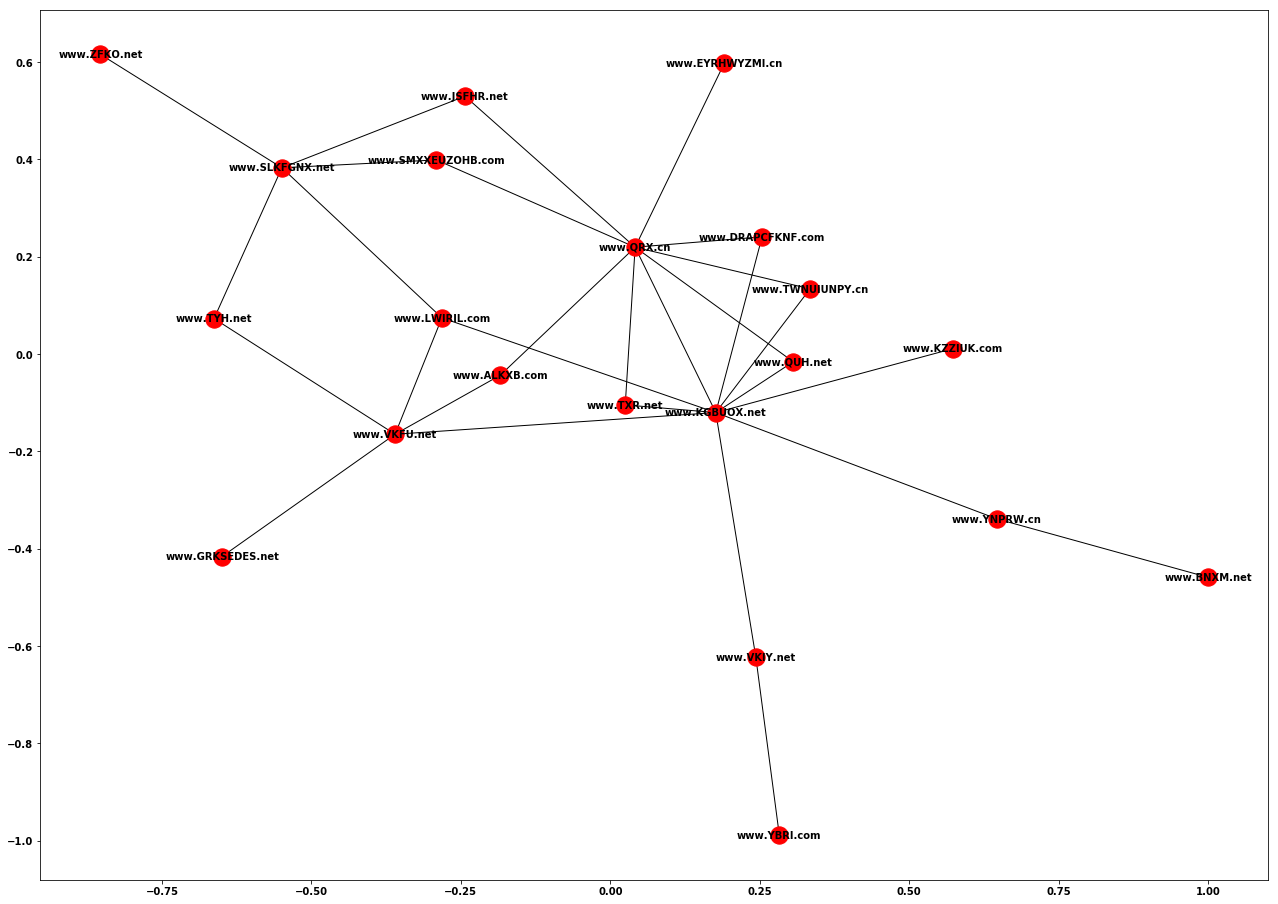

In [211]:
plt.figure(3, figsize=(22, 16))
nx.draw_networkx(website_network, font_size=10)

In [213]:
sorted(nx.pagerank(website_network).items(), key=lambda x: x[1], reverse=True)

[('www.KGBUOX.net', 0.1560828781964461),
 ('www.QRX.cn', 0.14923785664109987),
 ('www.SLKFGNX.net', 0.08234639424100026),
 ('www.VKFU.net', 0.08092960027845729),
 ('www.LWIRIL.com', 0.04816603125606076),
 ('www.VKIY.net', 0.041457757911866316),
 ('www.YNPRW.cn', 0.041457757911866316),
 ('www.TYH.net', 0.03489911512108797),
 ('www.JSFHR.net', 0.03382637525852806),
 ('www.SMXXEUZOHB.com', 0.03382637525852806),
 ('www.ALKXB.com', 0.03358569430073088),
 ('www.TWNUIUNPY.cn', 0.03309482192548685),
 ('www.TXR.net', 0.03309482192548685),
 ('www.DRAPCFKNF.com', 0.03309482192548685),
 ('www.QUH.net', 0.03309482192548685),
 ('www.BNXM.net', 0.02476261229504579),
 ('www.YBRI.com', 0.02476261229504579),
 ('www.ZFKO.net', 0.021141326610871144),
 ('www.GRKSEDES.net', 0.020900645653073965),
 ('www.KZZIUK.com', 0.02040977327782994),
 ('www.EYRHWYZMI.cn', 0.019827905790514057)]